In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

In [38]:
data = load_breast_cancer()

In [39]:
data

{'data':      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0          17.99         10.38          122.80     1001.0          0.11840   
 1          20.57         17.77          132.90     1326.0          0.08474   
 2          19.69         21.25          130.00     1203.0          0.10960   
 3          11.42         20.38           77.58      386.1          0.14250   
 4          20.29         14.34          135.10     1297.0          0.10030   
 ..           ...           ...             ...        ...              ...   
 564        21.56         22.39          142.00     1479.0          0.11100   
 565        20.13         28.25          131.20     1261.0          0.09780   
 566        16.60         28.08          108.30      858.1          0.08455   
 567        20.60         29.33          140.10     1265.0          0.11780   
 568         7.76         24.54           47.92      181.0          0.05263   
 
      mean compactness  mean concavity  me

In [28]:
data.frame.corr()['target'].apply(abs).sort_values(ascending=False)

target                     1.000000
worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
fractal dimension error    0.077972
smoothness error           0

In [3]:
data.data.shape

(569, 30)

In [4]:
data.target.shape

(569,)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=0, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 30) (114, 30) (455,) (114,)


In [29]:
clf = SVC(random_state=0)
scores = cross_val_score(clf, data.data, data.target, cv=5)
print("Cross Validation score: {:.3f}".format(scores.mean()))
clf.fit(X_train, y_train)
print("Accuracy on train data: {:.3f}".format(clf.score(X_train, y_train)))
print("Accuracy on test data: {:.3f}".format(clf.score(X_test, y_test)))

Cross Validation score: 0.912
Accuracy on train data: 0.910
Accuracy on test data: 0.930


In [30]:
clf = LogisticRegression(random_state=0)
scores = cross_val_score(clf, data.data, data.target, cv=5)
print("Cross Validation score: {:.3f}".format(scores.mean()))
clf.fit(X_train, y_train)
print("Accuracy on train data: {:.3f}".format(clf.score(X_train, y_train)))
print("Accuracy on test data: {:.3f}".format(clf.score(X_test, y_test)))

Cross Validation score: 0.939
Accuracy on train data: 0.956
Accuracy on test data: 0.947


/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

In [31]:
clf = DecisionTreeClassifier(random_state=0)
scores = cross_val_score(clf, data.data, data.target, cv=5)
print("Cross Validation score: {:.3f}".format(scores.mean()))
clf.fit(X_train, y_train)
print("Accuracy on train data: {:.3f}".format(clf.score(X_train, y_train)))
print("Accuracy on test data: {:.3f}".format(clf.score(X_test, y_test)))

Cross Validation score: 0.917
Accuracy on train data: 1.000
Accuracy on test data: 0.912


In [32]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)
scores = cross_val_score(clf, data.data, data.target, cv=5)
scores.mean()
print("Cross Validation score: {:.3f}".format(scores.mean()))
clf.fit(X_train, y_train)
print("Accuracy on train data: {:.3f}".format(clf.score(X_train, y_train)))
print("Accuracy on test data: {:.3f}".format(clf.score(X_test, y_test)))

Cross Validation score: 0.963
Accuracy on train data: 1.000
Accuracy on test data: 0.965


In [33]:
clf = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clf, data.data, data.target, cv=5)
scores.mean()
print("Cross Validation score: {:.3f}".format(scores.mean()))
clf.fit(X_train, y_train)
print("Accuracy on train data: {:.3f}".format(clf.score(X_train, y_train)))
print("Accuracy on test data: {:.3f}".format(clf.score(X_test, y_test)))

Cross Validation score: 0.975
Accuracy on train data: 1.000
Accuracy on test data: 0.956


In [11]:
clf = RandomForestClassifier(random_state=0)
param_grid = { 
    'n_estimators': [25, 50, 75, 100],
    'max_features': ['sqrt', 'log2', None],
    'max_depth' : [4,5,6,7],
    'criterion' :['gini', 'entropy', 'log_loss'],
    'min_samples_split': [2,4,6]
}
CV_rfc = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 5, 6, 7],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [25, 50, 75, 100]})

In [12]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 50}

In [36]:
pd.DataFrame(CV_rfc.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.032521,0.008236,0.001649,0.000309,gini,3,sqrt,2,50,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.941860,0.952941,0.941176,0.941176,0.952941,0.946019,0.005657,582
1,0.053691,0.000198,0.002762,0.000001,gini,3,sqrt,2,100,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.918605,0.941176,0.929412,0.941176,0.964706,0.939015,0.015350,823
2,0.108302,0.001971,0.005399,0.000128,gini,3,sqrt,2,200,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.918605,0.952941,0.929412,0.952941,0.964706,0.943721,0.017006,621
3,0.216059,0.001578,0.010569,0.000089,gini,3,sqrt,2,400,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.918605,0.952941,0.929412,0.952941,0.964706,0.943721,0.017006,621
4,0.027117,0.000134,0.001474,0.000017,gini,3,sqrt,4,50,"{'criterion': 'gini', 'max_depth': 3, 'max_fea...",0.930233,0.952941,0.941176,0.941176,0.952941,0.943694,0.008543,691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0.625796,0.018601,0.010623,0.000123,log_loss,8,None,6,400,"{'criterion': 'log_loss', 'max_depth': 8, 'max...",0.930233,0.952941,0.929412,0.952941,0.964706,0.946047,0.013929,514
860,0.077743,0.001878,0.001530,0.000059,log_loss,8,None,8,50,"{'criterion': 'log_loss', 'max_depth': 8, 'max...",0.918605,0.941176,0.941176,0.964706,0.976471,0.948427,0.020228,315
861,0.155465,0.004808,0.002808,0.000045,log_loss,8,None,8,100,"{'criterion': 'log_loss', 'max_depth': 8, 'max...",0.918605,0.952941,0.929412,0.952941,0.976471,0.946074,0.020251,457
862,0.321011,0.021152,0.005595,0.000195,log_loss,8,None,8,200,"{'criterion': 'log_loss', 'max_depth': 8, 'max...",0.918605,0.952941,0.929412,0.952941,0.964706,0.943721,0.017006,621


In [13]:
CV_rfc.best_score_

0.9604395604395604

In [14]:
CV_rfc.score(X_test, y_test)

0.9736842105263158

In [34]:
CV_rfc.best_estimator_.feature_importances_

array([0.02839975, 0.0197729 , 0.0336124 , 0.03036844, 0.00646723,
       0.00708483, 0.05163424, 0.08847396, 0.00419979, 0.0047106 ,
       0.02709739, 0.00370894, 0.01597182, 0.04308519, 0.00290734,
       0.00391292, 0.00678751, 0.00863663, 0.00958317, 0.00573969,
       0.08292783, 0.02123782, 0.13275746, 0.06900546, 0.01686888,
       0.0118219 , 0.03875995, 0.20380499, 0.00899184, 0.01166915])

Text(0.5, 1.0, 'Feature Importance')

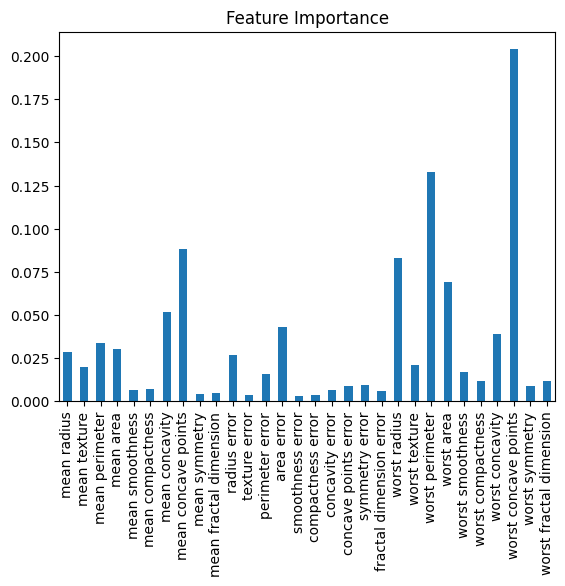

In [45]:
rf_importances = pd.Series(CV_rfc.best_estimator_.feature_importances_, index=data.frame.columns[:30])

fig, ax = plt.subplots()
rf_importances.plot.bar()
ax.set_title("Feature Importance")

In [15]:
clf = AdaBoostClassifier(random_state=0)
param_grid = { 
    'n_estimators': [10, 25, 50, 75, 100],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1]
}
CV_adb = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_adb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=0),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
                         'n_estimators': [10, 25, 50, 75, 100]})

In [16]:
CV_adb.best_score_

0.9714285714285715

In [18]:
CV_adb.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [19]:
CV_adb.score(X_test, y_test)

0.9736842105263158